<a href="https://www.kaggle.com/code/mrsimple07/counter-strike-analysis?scriptVersionId=174640181" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CS:GO Analytics Project

## Introduction

In this notebook, we will explore the fascinating world of Counter-Strike: Global Offensive (CS:GO) through a comprehensive analysis of three distinct datasets—maps_statistics, weapons_statistics, and competitive_players_statistics. Each dataset holds a wealth of information, allowing us to gain insights into the dynamics of the game, weapon performance, and the prowess of individual players.


In [1]:
import pandas as pd

df_map = pd.read_csv('/kaggle/input/counter-strike-2-statistics/maps_statistics.csv')
df_top = pd.read_csv('/kaggle/input/counter-strike-2-statistics/top_100_players.csv')
df_weapon = pd.read_csv('/kaggle/input/counter-strike-2-statistics/weapons_statistics.csv')

df_map.head()

,Map,Play Rate,T-Win %,CT-Win %,Matches
0,Dust II,26.7%,49.2%,50.8%,"168,288"
1,Mirage,23.9%,49.1%,50.9%,"150,883"
2,Inferno,13.1%,50.3%,49.7%,"82,737"
3,Nuke,4.3%,47.0%,53.0%,"27,211"
4,Vertigo,4.0%,47.8%,52.2%,"25,390"


In [2]:
df_top.head()

,Rank,Name,CS Rating,Region,Wins,Ties,Losses
0,1,sH0oRuk YouTube,"31,203",Asia,278,9,98
1,2,TTpo100Razeb Daniel,"29,626",Europe,250,12,174
2,3,REZPEZTâ¢,"29,588",Europe,133,2,58
3,4,rAdek1ngâ,"29,548",South America,75,1,8
4,5,ð,"29,480",Asia,106,0,10


In [3]:
df_weapon.head()

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
0,AK-47,1.2,17.8%,59.4%,16.7%,"370,567"
1,M4A1-S,1.1,14.6%,60.3%,18.3%,"181,934"
2,AWP,1.6,14.5%,68.7%,10.1%,"164,754"
3,M4A1,1.2,18.0%,60.6%,15.5%,"104,012"
4,USP-S,0.9,21.2%,63.5%,10.5%,"94,958"


In [4]:
df_map.describe()

,Map,Play Rate,T-Win %,CT-Win %,Matches
count,10,10,10,10,10
unique,10,10,10,10,10
top,Dust II,26.7%,49.2%,50.8%,"168,288"
freq,1,1,1,1,1


In [5]:
df_top.describe()

,Rank,Wins,Ties,Losses
count,100.000000,100.00000,100.000000,100.000000
mean,50.500000,95.96000,2.170000,35.190000
std,29.011492,73.86432,3.206858,47.761126
min,1.000000,21.00000,0.000000,0.000000
25%,25.750000,37.75000,0.000000,7.000000
50%,50.500000,79.50000,1.000000,16.000000
75%,75.250000,130.25000,2.250000,44.000000
max,100.000000,376.00000,17.000000,305.000000


In [6]:
df_weapon.describe()

,KPR
count,20.000000
mean,1.060000
std,0.290915
min,0.700000
25%,0.875000
50%,1.000000
75%,1.200000
max,1.900000


1. **Map Dynamics Exploration:**
   - Investigate the play rates and win percentages on popular CS:GO maps such as Dust II, Mirage, and Inferno.
   - Uncover patterns in team-specific win percentages (T-Win % and CT-Win %) to understand the strategic nuances of each map.


In [7]:
df_map.head()

,Map,Play Rate,T-Win %,CT-Win %,Matches
0,Dust II,26.7%,49.2%,50.8%,"168,288"
1,Mirage,23.9%,49.1%,50.9%,"150,883"
2,Inferno,13.1%,50.3%,49.7%,"82,737"
3,Nuke,4.3%,47.0%,53.0%,"27,211"
4,Vertigo,4.0%,47.8%,52.2%,"25,390"


First, we have to change the percentages and apply the data into numerical type.

In [8]:
df_map['Play Rate'] = df_map['Play Rate'].str.rstrip('%').astype('float') 
df_map['T-Win %'] = df_map['T-Win %'].str.rstrip('%').astype('float')     
df_map['CT-Win %'] = df_map['CT-Win %'].str.rstrip('%').astype('float')    
df_map['Matches'] = df_map['Matches'].str.replace(',', '').astype(int)


#If you want to round the % to the integer.
# df_map['Play Rate'] = df_map['Play Rate'].round().astype('int')
# df_map['T-Win %'] = df_map['T-Win %'].round().astype('int')
# df_map['CT-Win %'] = df_map['CT-Win %'].round().astype('int')


In [9]:
df_map.head()

,Map,Play Rate,T-Win %,CT-Win %,Matches
0,Dust II,26.7,49.2,50.8,168288
1,Mirage,23.9,49.1,50.9,150883
2,Inferno,13.1,50.3,49.7,82737
3,Nuke,4.3,47.0,53.0,27211
4,Vertigo,4.0,47.8,52.2,25390


The data is ready for visualizations

##### Visualization 1.1: Play Rates Pie Chart
Each slice of the pie corresponds to a different map, with the size of the slice indicating the proportion of matches played on that map.

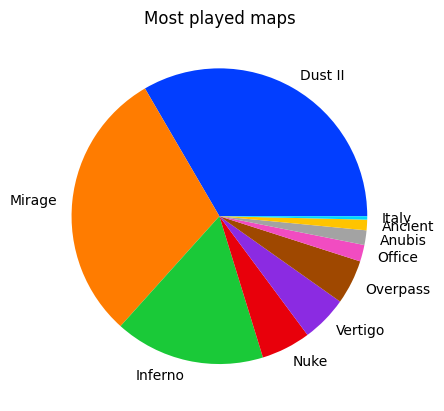

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("bright")

plt.pie(x= df_map['Matches'], labels = df_map['Map'], radius = 1, colors = colors)
plt.title('Most played maps')
plt.show()

##### Visualization 1.2: Play Rates Bar Chart
Comparing the play rates of different maps side by side. This can provide a clearer comparison of the popularity of each map.

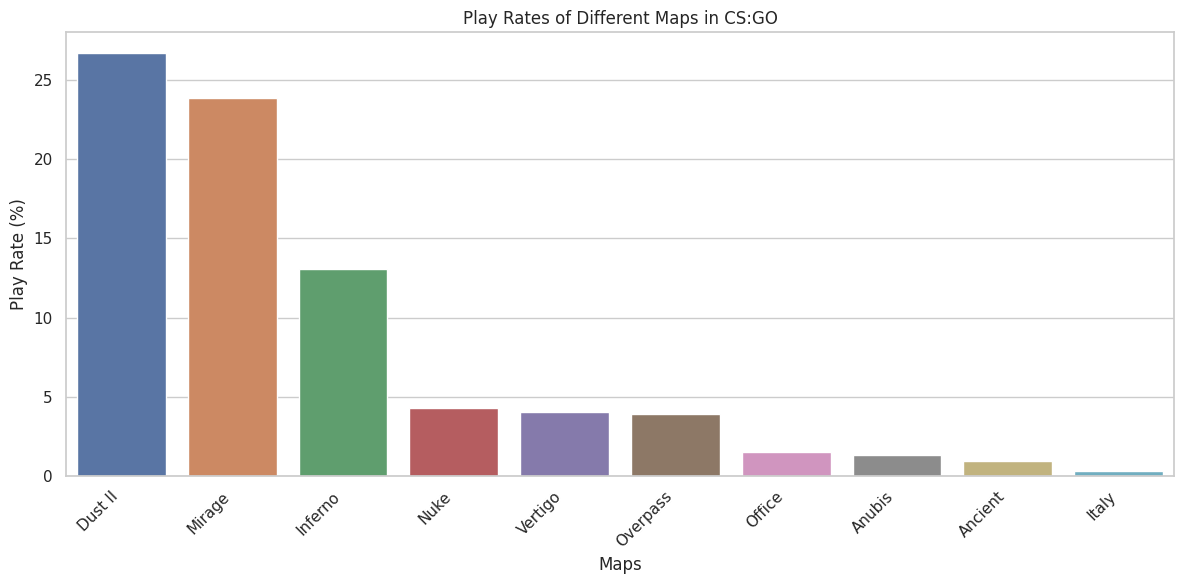

In [11]:
sns.set(style = 'whitegrid')

df_map_play = df_map.sort_values(by='Play Rate', ascending=False)
plt.figure(figsize = (12,6))
sns.barplot(x= df_map['Map'], y = df_map['Play Rate'])
plt.xlabel('Maps')
plt.ylabel('Play Rate (%)')
plt.title('Play Rates of Different Maps in CS:GO')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()

plt.show()

##### Visualization 1.3: Win Percentages Stacked Bar Chart
A stacked bar chart to illustrate the win percentages for both Terrorist (T) and Counter-Terrorist (CT) sides on each map. This can help identify patterns in team-specific performances.

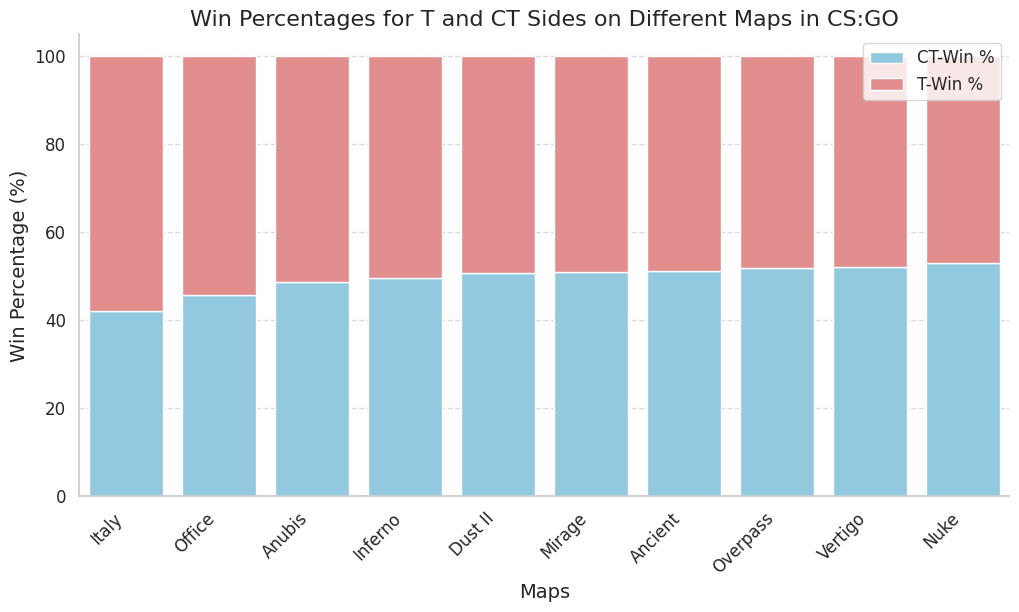

In [12]:
sns.set(style = 'whitegrid')

df_win_percentages = df_map.sort_values(by='T-Win %', ascending=False)

sns.set(style="whitegrid")
sns.set_palette("pastel")  

# Stacked Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Map', y='CT-Win %', data=df_win_percentages, label='CT-Win %', color='skyblue')
sns.barplot(x='Map', y='T-Win %', data=df_win_percentages, label='T-Win %', color='lightcoral', bottom=df_win_percentages['CT-Win %'])

plt.xlabel('Maps', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)
plt.title('Win Percentages for T and CT Sides on Different Maps in CS:GO', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


sns.despine()


plt.show()

2. **Weapon Performance Analysis:**
   - Delve into the statistics of key weapons like AK-47, M4A1-S, and AWP.
   - Explore metrics such as Kill Per Round (KPR), Headshot Percentage (HS %), Chest %, Leg %, and Total Kills to gauge the effectiveness of each weapon.


In [13]:
df_weapon.head()

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
0,AK-47,1.2,17.8%,59.4%,16.7%,"370,567"
1,M4A1-S,1.1,14.6%,60.3%,18.3%,"181,934"
2,AWP,1.6,14.5%,68.7%,10.1%,"164,754"
3,M4A1,1.2,18.0%,60.6%,15.5%,"104,012"
4,USP-S,0.9,21.2%,63.5%,10.5%,"94,958"


Again we have to work with data types

In [14]:
df_weapon['HS %'] = df_weapon['HS %'].str.rstrip('%').astype('float') 
df_weapon['Chest %'] = df_weapon['Chest %'].str.rstrip('%').astype('float')     
df_weapon['Leg %'] = df_weapon['Leg %'].str.rstrip('%').astype('float')    
df_weapon['Total Kills'] = df_weapon['Total Kills'].str.replace(',', '').astype(int)

df_weapon.head()

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
0,AK-47,1.2,17.8,59.4,16.7,370567
1,M4A1-S,1.1,14.6,60.3,18.3,181934
2,AWP,1.6,14.5,68.7,10.1,164754
3,M4A1,1.2,18.0,60.6,15.5,104012
4,USP-S,0.9,21.2,63.5,10.5,94958


#### 2.1. Top 10 weapons with most kills

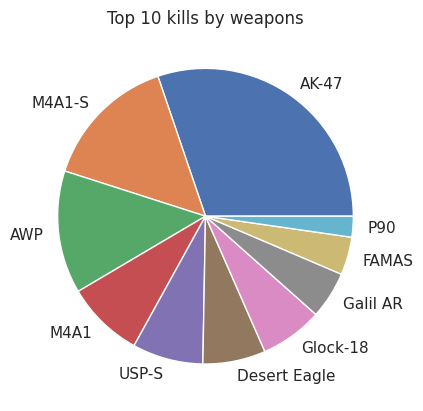

In [15]:
sns.set(style = 'whitegrid')
plt.pie(x = df_weapon['Total Kills'][0:10], labels =df_weapon['Weapon'][0:10])
plt.title('Top 10 kills by weapons')
plt.show()

#### 2.2. Top 5 weapon which was given headshot

In [16]:
df_weapon_hs = df_weapon.sort_values(by = 'HS %', ascending = False)
df_weapon_hs

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
5,Desert Eagle,0.9,28.5,58.7,9.0,84197
4,USP-S,0.9,21.2,63.5,10.5,94958
8,FAMAS,1.0,18.9,58.7,16.9,50834
15,P250,0.7,18.2,63.3,13.0,12575
7,Galil AR,1.1,18.1,57.6,18.4,63215
3,M4A1,1.2,18.0,60.6,15.5,104012
0,AK-47,1.2,17.8,59.4,16.7,370567
6,Glock-18,0.9,17.8,65.5,11.8,83899
18,G3SG1,1.9,15.1,61.3,15.5,9289
16,Tec-9,0.8,14.9,63.2,15.6,11796


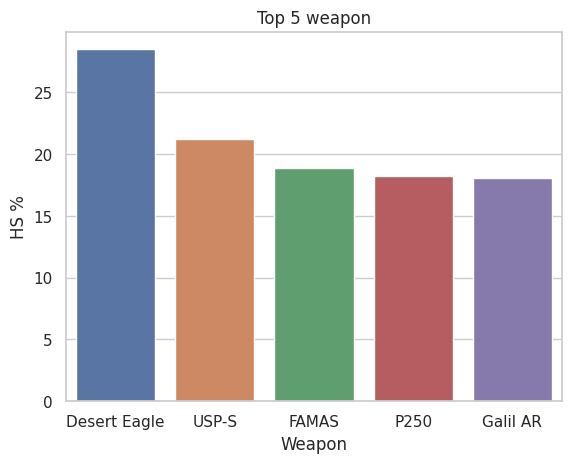

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

top_5 = df_weapon_hs['Weapon'][0:5]
sns.set(style = 'whitegrid')
sns.barplot(data =df_weapon_hs, x = top_5, y= df_weapon_hs['HS %'])
plt.title('Top 5 weapon')
plt.show()

3. **Individual Player Profiling:**
   - Focus on the top 100 players in competitive CS:GO, examining their rankings, CS Ratings, and regional distributions.
   - Analyze the performance metrics of notable players like sH0oRuk YouTube, TTpo100Razeb Daniel, and REZPEZT™.


In [18]:
df_top.head(10)

,Rank,Name,CS Rating,Region,Wins,Ties,Losses
0,1,sH0oRuk YouTube,"31,203",Asia,278,9,98
1,2,TTpo100Razeb Daniel,"29,626",Europe,250,12,174
2,3,REZPEZTâ¢,"29,588",Europe,133,2,58
3,4,rAdek1ngâ,"29,548",South America,75,1,8
4,5,ð,"29,480",Asia,106,0,10
5,6,Riky,"29,440",Europe,38,0,2
6,7,ravenous,"29,404",South America,41,0,1
7,8,Garfield,"29,322",Europe,25,0,0
8,9,shining,"29,317",Europe,33,0,2
9,10,core,"29,300",Europe,97,4,8


#### 3.1. Top Regions

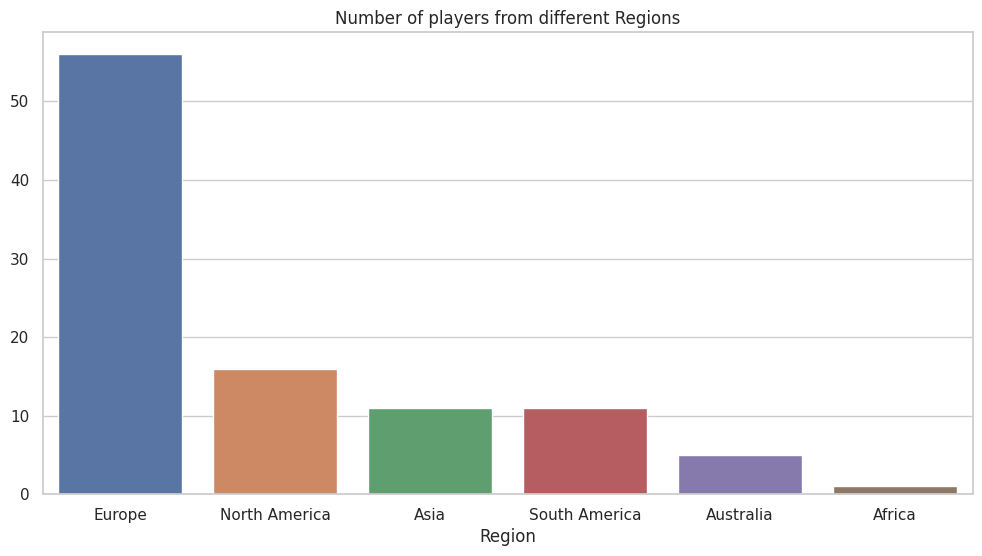

In [19]:
sns.set(style = 'whitegrid')

num_regions = df_top['Region'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x = num_regions.index, y =num_regions.values)
plt.title('Number of players from different Regions')
plt.show()

In [20]:
df_top['CS Rating'] = df_top['CS Rating'].str.replace(',', '').astype(int)

#### 3.2. Summary Statistics for each region

In [21]:
df_region_stats = df_top.groupby('Region').agg({
    'CS Rating': 'mean',  
    'Wins': 'sum',      
    'Ties': 'sum',       
    'Losses': 'sum'      
}).reset_index()

df_region_stats = df_region_stats.sort_values(by='CS Rating', ascending=False)

print(df_region_stats)

          Region     CS Rating  Wins  Ties  Losses
5  South America  28236.454545  1264    31     329
1           Asia  28231.090909  1605    35     707
3         Europe  27986.428571  4475   103    1775
4  North America  27711.750000  1622    31     527
2      Australia  27395.400000   476    15     132
0         Africa  27342.000000   154     2      49
